In [200]:
import numpy as np
from numpy.fft import fft,ifft,fftfreq,fftshift
import matplotlib.pyplot as plt

In [201]:
#question II part a

def fft_sin(L,N): #inputs:interval : [0,L],number of space points N
    
    dx=L/N #space-spacing
    
    x=np.arange(0,L,dx) #space points
    
    k=fftfreq(N,1/N)*(2*np.pi)/L #wave numbers
    
    u=np.sin(x) #the given function
    
    uk=fft(u) #the fft of sin(x)
    
    uk_actual=fft(u)/N #the actual fourier transform by removing the factor N
    
    #plotting imaginary part of fourier coefficient vs k
    
    #the expected points to come in plot
    
    x_expected=np.array([-1,1])
    
    y_expected=np.array([0.5,-0.5])
    
    fig,axs=plt.subplots(2) #vertically stacked plots
    
    #plotting the fft
    
    axs[0].scatter(k,np.imag(uk)) 
    
    axs[0].scatter(x_expected,N*y_expected,color='g',marker=2)
    
    axs[0].set_xlabel('wavenumber k')
    
    axs[0].set_ylabel('N*fourier_coefficient')
    
    axs[0].set_xlim(-5,5)
    
    #plotting the actual fourier transform
    
    axs[1].scatter(k,np.imag(uk_actual))
    
    axs[1].scatter(x_expected,y_expected,color='g',marker=2)
    
    axs[1].set_xlabel('wavenumber k')
    
    axs[1].set_ylabel('fourier_coefficient')
    
    axs[1].set_xlim(-5,5)
    
    fig.suptitle('plotting imaginary part of fourier_coefficient')
    
    
    

In [202]:

L=2*np.pi

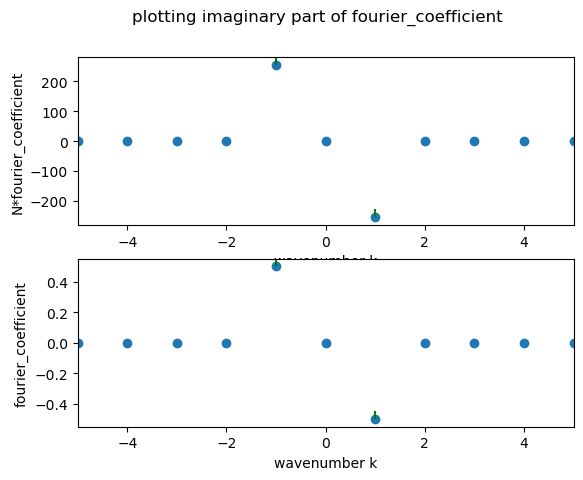

In [203]:
N=2**9

fft_sin(L,N)

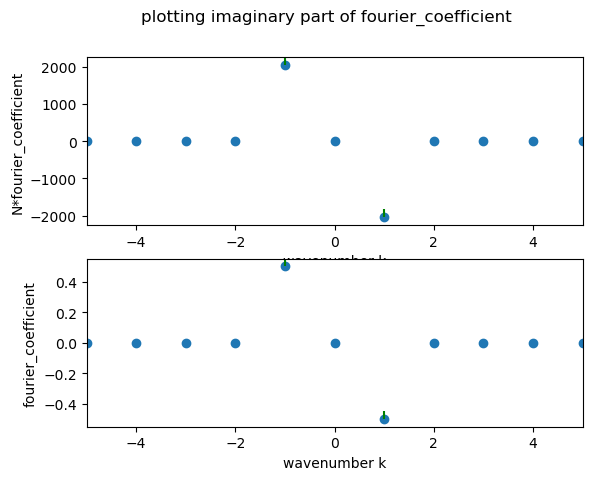

In [204]:
N=2**12

fft_sin(L,N)

In [205]:
#question II part b

def inversefft_sin(L,N): #inputs:interval : [0,L],number of space points N
    
    dx=L/N #space-spacing
    
    x=np.arange(0,L,dx) #space points
    
    k=fftfreq(N,1/N)*(2*np.pi)/L #wave numbers
    
    u=np.sin(x) #the given function
    
    uk=fft(u) #the fft of sin(x)
    
    uk_actual=fft(u)/N #the actual fourier transform by removing the factor N
    
    u_inversefft_actual=np.real(ifft(uk)) #actual inverse
    
    u_inversefft_scaled=np.real(ifft(uk_actual)) #scaled by 1/N
    
    #plotting inverse of fourier transform vs x and comparing with the actual function 
    
    fig,axs=plt.subplots(2) #vertically stacked plots
    
    #plotting the fft
    
    axs[0].plot(x,u_inversefft_actual,color='b',label='u_inversefft_actual') 
    
    axs[0].scatter(x,u,color='r',marker='*',label='actual')
    
    axs[0].set_xlabel('x')
    
    axs[0].set_ylabel('u')
    
    axs[0].legend()
    
    #axs[0].set_xlim(-5,5)
    
    #plotting the actual fourier transform
    
    axs[1].plot(x,u_inversefft_scaled,color='b',label='u_inversefft_scaled') 
    
    axs[1].scatter(x,u/N,color='r',marker='*',label='actual_scaled')
    
    axs[1].set_xlabel('x')
    
    axs[1].set_ylabel('u_scaled')
    
    axs[1].legend()
    
    #axs[1].set_xlim(-5,5)
    
    fig.suptitle('comparing u with the two inverse ffts')



In [206]:
L=2*np.pi

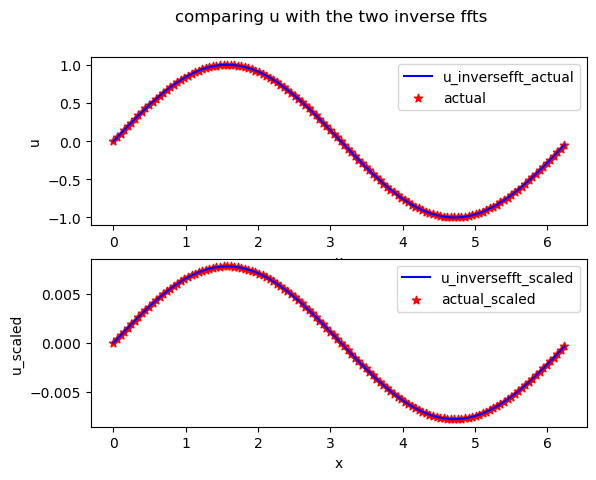

In [207]:
N=2**7

inversefft_sin(L,N)

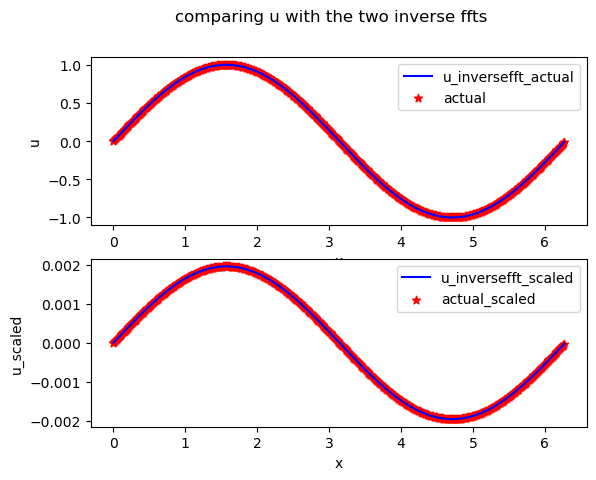

In [208]:
N=2**9

inversefft_sin(L,N)

In [209]:
#question II part (c)

def fftshift_sin(L,N,M): #inputs:interval : [0,L],number of space points N,no of zeros added :M
    
    dx=L/N
    
    x=np.arange(0,L,dx) #space points
    
    k=fftfreq(N,1/N)*(2*np.pi)/L #wave numbers
    
    u=np.sin(x) #the given function
    
    uk=fft(u) #the fft of sin(x)
    
    
    uk_actual=fft(u)/N #the actual fourier transform by removing the factor N
    
    uk_actual_shift=fftshift(uk_actual) #applying fft shift to fourier transform

    zeros=np.zeros(int(M/2)) #the list of zeros to append at beginning and end

    uk_actual_shift_zeros=np.concatenate((zeros,uk_actual_shift,zeros),axis=None) #appending zeros to shifted fourier transform

    uk_actual_shift_zeros_shift=fftshift(uk_actual_shift_zeros) #taking another shift of above to get a new function with extra zeros on larger wave numbers
    
    uk_new=(N+M)*uk_actual_shift_zeros_shift #rescaling
    
    
    u_new=np.real(ifft(uk_new)) #new function obtained by this process
    
    
    dx_new=L/(N+M)
    
    x_new=np.arange(0,L,dx_new)
    
    
    #plotting
    
    plt.scatter(x,u,color='r',label='actual u')
    
    plt.plot(x_new,u_new,color='b',label='new u')
    
    plt.xlabel('x')
    
    plt.ylabel('u')
    
    plt.legend()
    
    


    

In [210]:
L=2*np.pi

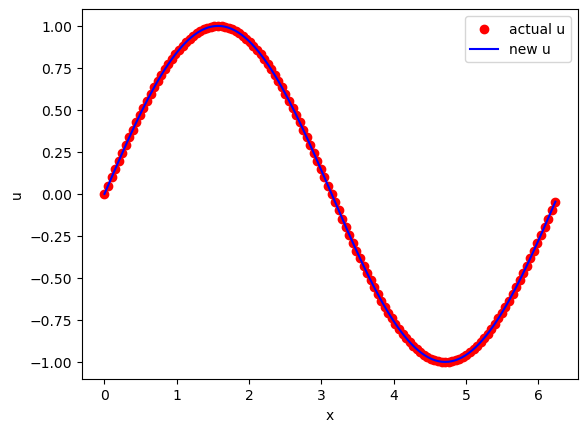

In [211]:
N=2**7

M=2**3

fftshift_sin(L,N,M)

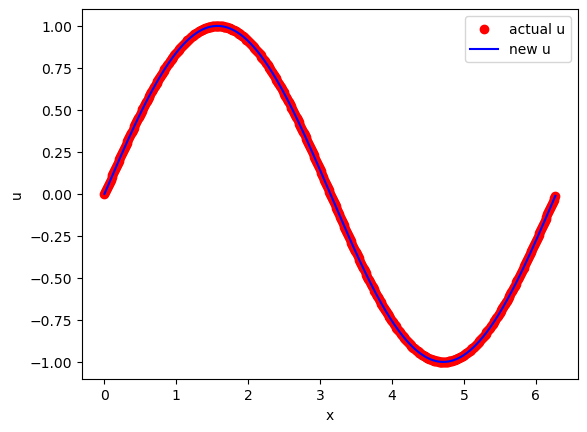

In [212]:
N=2**9

M=2**5

fftshift_sin(L,N,M)

In [213]:
#question II part (d)

def spectral_derivative(u,L,N): #inputs:function:u,interval : [0,L],number of space points :N
    
    dx=L/N #space-spacing
    
    x=np.arange(0,L,dx) #space points
    
    k=fftfreq(N,1/N)*(2*np.pi)/L #wave numbers
    
    uk=fft(u) #the fft of u
    
    uxk=1j*k*uk #the fft of x derivative of u
    
    ux=np.real(ifft(uxk)) #the x derivative of u
    
    return ux

In [214]:

L=2*np.pi

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=np.sin(x)

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=np.cos(x)

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

1.3322676295501878e-14


In [215]:

L=2*np.pi

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=np.cos(x)+np.cos(2*x)

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=-np.sin(x)-2*np.sin(2*x)

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

3.2862601528904634e-14


In [216]:
L=2*np.pi

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=x**3

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=3*x**2

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

#not working on non-perioding functions as expected

3479.4615114389226


In [217]:
L=10**3

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=np.exp(-x**2)

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=-x*np.exp(-x**2)

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

#working on fast decaying functions

0.1279742968729624


In [218]:
L=10**5

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=np.exp(-x**2)

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=-x*np.exp(-x**2)

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

#working better with higher L due to decay

0.001279742968729624


In [219]:
L=10**8

N=2**7

dx=L/N

x=np.arange(0,L,dx)

u=np.exp(-x**2)

computed_derivative=spectral_derivative(u,L,N)

actual_derivative=-x*np.exp(-x**2)

error=np.max(np.abs(computed_derivative-actual_derivative))

print(error)

#working better with higher L due to decay

1.279742968729624e-06


In [220]:
#question III part (a)

def InitCondition(N,m): #number of space points :N,wavenumber-m
    
    dx=2*np.pi/N #space-spacing
    
    x=np.arange(0,2*np.pi,dx) #space points
    
    k=fftfreq(N,1/N) #wave numbers
    
    u=np.sin(m*x)
    
    uk=fft(u)
    
    return uk
    

In [221]:
N=2**5

m=3

k=fftfreq(N,1./N)

#expected return

expected_return=np.zeros_like(k,dtype='complex')

expected_return[int(m)]=-0.5*1j*N

expected_return[int(N-m)]=0.5*1j*N

#computed return

computed_return=InitCondition(N,m)

#error

error=np.max(np.abs(expected_return-computed_return))

print(error)



9.084497367723118e-15


In [222]:
#question III part (b)

def InitCondition_modified(N,m): #number of space points :N,wavenumber-m
    
    dx=2*np.pi/N #space-spacing
    
    x=np.arange(0,2*np.pi,dx) #space points
    
    k=fftfreq(N,1/N) #wave numbers
    
    kmax=int(np.max(k)) #max positive k
    
    u=np.sin(m*x)
    
    uk=fft(u) #fft of u
    
    uk_positive=uk[:kmax+1] #fft of u for k>=0
    
    return uk_positive

In [223]:
N=2**7

m=8

k=fftfreq(N,1./N)

kmax=int(np.max(k))

k_positive=k[0:kmax+1] #positive part of k

#expected return

expected_return=np.zeros_like(k_positive,dtype='complex')

expected_return[int(m)]=-0.5*1j*N

#computed return

computed_return=InitCondition_modified(N,m)

#error

error=np.max(np.abs(expected_return-computed_return))

print(error)

6.532193151267538e-14


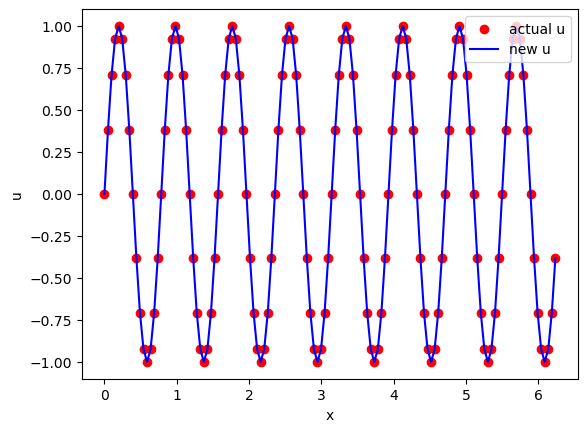

In [224]:
#sanity check

N=2**7

m=8

dx=2*np.pi/N #space-spacing
    
x=np.arange(0,2*np.pi,dx) #space points

u=np.sin(m*x) #actual function

uk_positive=InitCondition_modified(N,m) #positive part of fft of u

k=fftfreq(N,1./N) #wave numbers

#creating uk_negative

k_negative=k[kmax+1:]

uk_negative=np.zeros_like(k_negative,dtype='complex')

for i in range(1,kmax+1):
    
    uk_negative[N-i-kmax-1]=np.conj(uk_positive[i])
    
#uk

uk=np.concatenate((uk_positive,uk_negative),axis=None)

u_new=np.real(ifft(uk))

#plotting

plt.scatter(x,u,color='r',label='actual u')
    
plt.plot(x,u_new,color='b',label='new u')
    
plt.xlabel('x')
    
plt.ylabel('u')
    
plt.legend()
    



In [243]:
#question III part (c)

def DerivP(uk_positive,k,p): #inputs-positive fft of function u,wave numbers -k,positive integer p
    
    kmax=int(np.max(k))
    
    k_positive=k[:kmax+1] #positive part of k
    
    return ((1j*k_positive)**p)*uk_positive
    

In [244]:

L=2*np.pi 

N=2**7

dx=L/N

x=np.arange(0,L,dx)

k=fftfreq(N,1./N)*(2*np.pi/L)

kmax=int(np.max(k))

p=4

u=np.exp(1j*x)

uk=fft(u)

uk_positive=uk[:kmax+1]

computed_pderivative_k=DerivP(uk_positive,k,p)

exact_pderivative_k=fft((1j**p)*u)[0:kmax+1]

error=np.max(np.abs(computed_pderivative_k-exact_pderivative_k))

print(error)


3.0727798604958274e-08


In [246]:
#question III part (d)

def diffusionsolution(uk,k,nu,t):
    
    return np.exp(-nu*(k**2)*t)*uk


In [249]:
L=2*np.pi 

N=2**7

dx=L/N

x=np.arange(0,L,dx)

k=fftfreq(N,1./N)*(2*np.pi/L)

nu=1

t=0.7

u=np.sin(x)

uk=fft(u)

exact_sol=np.exp(-nu*t)*np.sin(x) #exact solution

exact_sol_k=fft(exact_sol) #fft of exact solution

computed_sol_k=diffusionsolution(uk,k,nu,t) #computed fft of solution

error=np.max(np.abs(exact_sol_k-computed_sol_k)) #error

print(error)

3.9984953305991855e-15


In [255]:
#III part (d)

#writing a get-rhs fn of burgers with dealias filter
#parameters -function u,viscosity nu,wavenumber array k

def getrhs(uk,nu,k):
    uxk=1j*k*uk #discrete fourier transform of ux
    ux=np.real(ifft(uxk)) #first space derivative of u
    uxxk=-(k**2)*uk #discrete fourier transform of uxx
    nlp=u*ux #non-linear term 
    nlpk=fft(nlp) #fft of non-linear term
    return nlpk+nu*uxxk

In [256]:
#checking if the function works

N=2**15
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
k=fftfreq(N,1/N)
u=1+np.cos(x)+np.cos(2*x)
uk=fft(u)
ux=-np.sin(x)-2*np.sin(2*x)
uxx=-np.cos(x)-4*np.cos(2*x)
nu=7*(10**(-6))
computedrhs=getrhs(uk,nu,k)
actualrhs=fft(u*ux+nu*uxx)
error=np.max(np.abs(computedrhs-actualrhs))
print(error)

3.645736497181509e-08
